### Colab Pro

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Jun 13 14:56:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


### Install dependancies

In [0]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [4]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (47.1.1)


In [5]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

### Imports

In [0]:
import timeit

In [0]:
import sys
import inspect

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
codes_path  = "drive/My Drive/RL_Project/"

In [0]:
sys.path.append(codes_path)

In [11]:
from space_invaders import SpaceInvader

Using TensorFlow backend.


In [0]:
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [0]:
%load_ext autoreload
%autoreload 2

### Hyperparams

In [0]:
network = "DeepQ"
mode = "test" # train
load = "saved.h5" # weights file

### Helper functions

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

### Test the default weights

In [0]:
game_instance = SpaceInvader(network)

Successfully constructed networks.


In [0]:
stat = game_instance.calculate_mean(50)
print("Game Statistics")
print(stat)

Game Statistics
(208.0, 118.66338946785567)


In [0]:
game_instance.simulate(save=True)

In [0]:
show_video()

### Train the network

#### Default Config

In [0]:
num_frames = 500000

In [0]:
game_instance = SpaceInvader(network)

Successfully constructed networks.


In [0]:
stat = game_instance.calculate_mean(50)
print("Game Statis4.69K subscriberstics")
print(stat)

Game Statistics
(221.4, 83.16273203785455)


In [0]:
game_instance.simulate(save=True)

In [0]:
show_video()

In [0]:
start = timeit.time.time()
(predict_q_values, alive_frames,
  total_rewards, bellman_loss) = game_instance.train(
      num_frames=num_frames,
      filepath="drive/My Drive/RL_Project/double_50e5/")
print(timeit.time.time()-start)
game_instance.deep_q.save_network('drive/My Drive/RL_Project/double_50e5/weights.h5')

Saving Network
Successfully saved network.
Executing loop 999
Executing loop 1999
Executing loop 2999
Executing loop 3999
Executing loop 4999
Executing loop 5999
Executing loop 6999
Executing loop 7999
Executing loop 8999
Executing loop 9999
Executing loop 10999
Executing loop 11999
Executing loop 12999
Executing loop 13999
Executing loop 14999
Executing loop 15999
Executing loop 16999
Executing loop 17999
Executing loop 18999
Executing loop 19999
Saving Network
Successfully saved network.
Executing loop 20999
Executing loop 21999
Executing loop 22999
Executing loop 23999
Executing loop 24999
Executing loop 25999
Executing loop 26999
Executing loop 27999
Executing loop 28999
Executing loop 29999
Executing loop 30999
Executing loop 31999
Executing loop 32999
Executing loop 33999
Executing loop 34999
Executing loop 35999
Executing loop 36999
Executing loop 37999
Executing loop 38999
Executing loop 39999
Saving Network
Successfully saved network.
Executing loop 40999
Executing loop 41999


In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

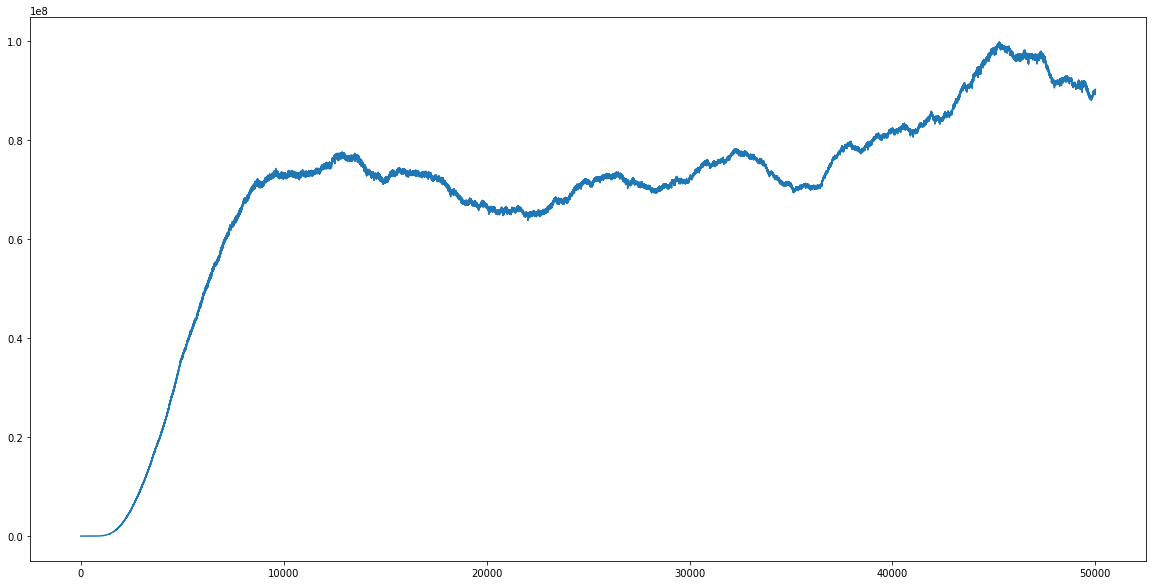

In [0]:
plt.plot(predict_q_values)

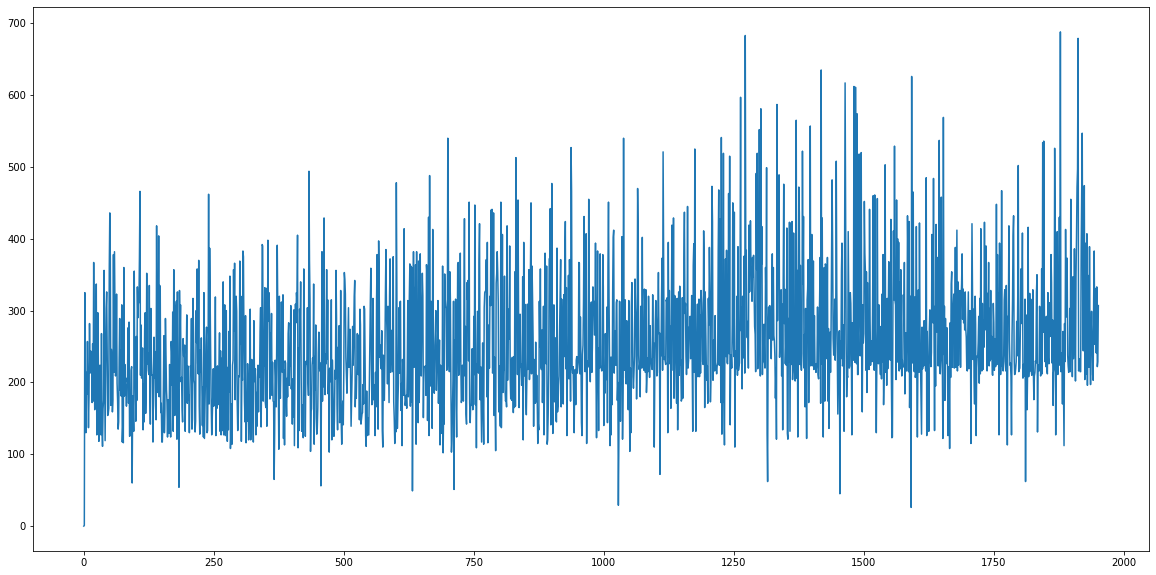

In [0]:
plt.plot(alive_frames)

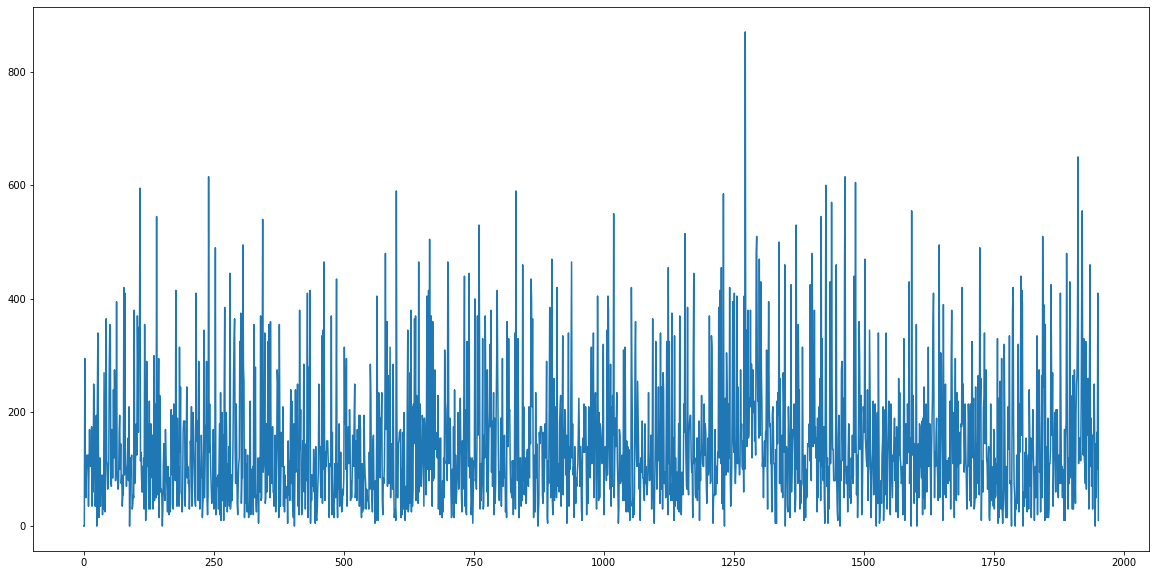

In [0]:
plt.plot(total_rewards)

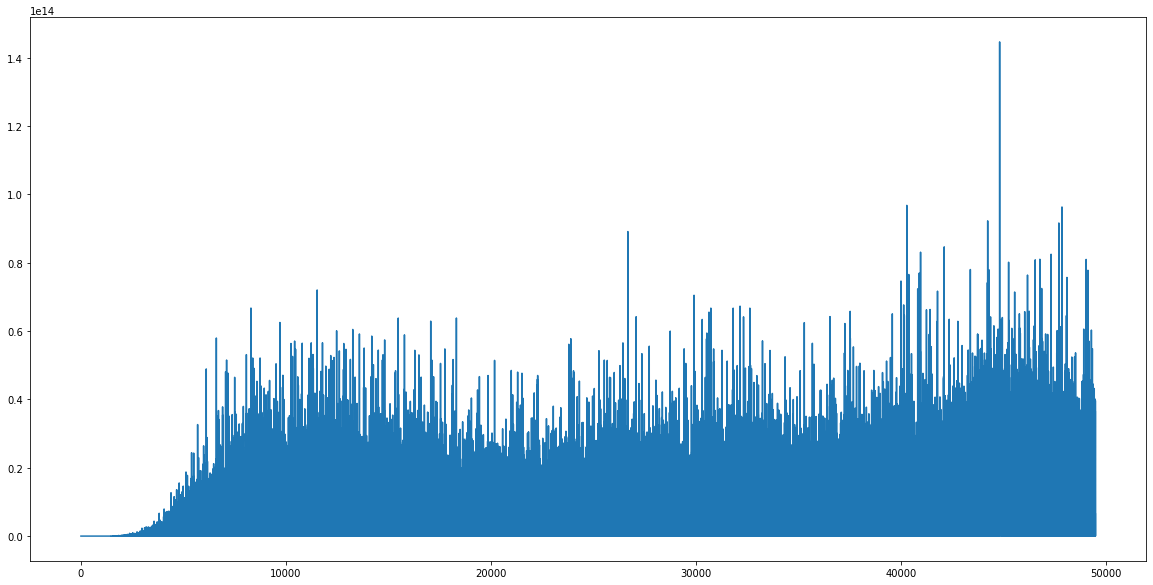

In [0]:
plt.plot(bellman_loss)

In [0]:
stat = game_instance.calculate_mean(50)
print("Game Statistics")
print(stat)

Game Statistics
(32.2, 70.51354479814499)


In [0]:
game_instance.simulate(save=True)
show_video()

### Load weights


In [16]:
game_instance2 = SpaceInvader(network)
game_instance2.calculate_mean(num_samples=500)

Successfully constructed networks.


(237.86, 97.25698124042306)

In [0]:
import pickle

# preappend_name = 'drive/My Drive/RL_Project/double_50e5/final_'
# f = open(preappend_name+"stats.pkl", "wb")
# pickle.dump({'alive_frames': alive_frames,
#                             'total_rewards': total_rewards,
#                             'q_values': predict_q_values,
#                             'loss': bellman_loss,
#                             'mean_score': 212,
#                             'std_score': 116
#                             }, f)
# f.close()

#### Reload the weight


In [18]:
network

'DeepQ'

In [17]:
game_instance3 = SpaceInvader(network)
game_instance3.load_network("drive/My Drive/RL_Project/double_50e5/DeepQ_480000_2065_saved.h5")
game_instance3.calculate_mean(500)

Successfully constructed networks.
Succesfully loaded network.


(1.33, 3.9218745517928033)

In [0]:
game_instance3.simulate(save=True)
show_video()

In [0]:
import pickle

preappend_name = 'drive/My Drive/RL_Project/double_50e5/'
stats = pickle.load(open(preappend_name+"DeepQ_480000_2065_stats.pkl", "rb"))
stats_duel = pickle.load(open("drive/My Drive/RL_Project/duel_50e5/DuelQ_480000_7463_stats.pkl", "rb"))




In [0]:
stats.keys()

dict_keys(['alive_frames', 'total_rewards', 'q_values', 'loss', 'mean_score', 'std_score'])

In [0]:
len(stats['q_values'])

48001

Text(0.5, 1.0, 'Q-values')

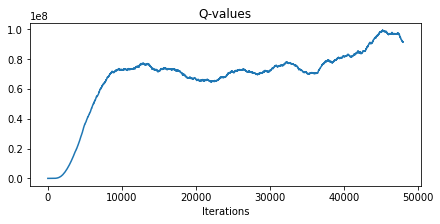

In [0]:
#Doubel Q-vals
small = int(len(stats['q_values'])/10)

plot_double = np.zeros(small)
plot_duel = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_double[i] = np.mean(stats['q_values'][10*i:10*(i+1)])
  x[i] = (i+1)*10

plt.plot(x, plot_double)
plt.xlabel('Iterations')
plt.title('Double DQN Q-values')

Text(0.5, 1.0, 'Q-values')

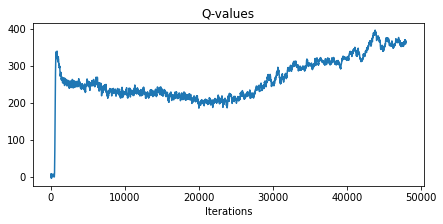

In [0]:
#Dueling Q-Vals
small = int(len(stats['q_values'])/10)

plot_double = np.zeros(small)
plot_duel = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_duel[i] = np.mean(stats_duel['q_values'][10*i:10*(i+1)])
  x[i] = (i+1)*10

plt.plot(x, plot_duel)
plt.xlabel('Iterations')
plt.title('Q-values')

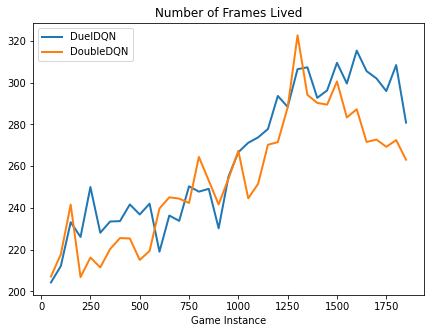

In [0]:
small = int(len(stats['alive_frames'])/50)

plot_double = np.zeros(small)
plot_duel = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_double[i] = np.mean(stats['alive_frames'][50*i:50*(i+1)])
  plot_duel[i] = np.mean(stats_duel['alive_frames'][50*i:50*(i+1)])
  x[i] = (i+1)*50

plt.plot(x, plot_duel, linewidth = 2, label = 'DuelDQN')
plt.plot(x, plot_double, linewidth = 2, label= 'DoubleDQN')

plt.xlabel('Game Instance')
plt.title('Number of Frames Lived')
plt.legend()

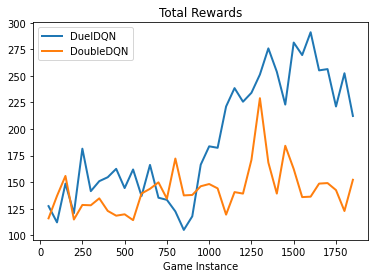

In [0]:
small = int(len(stats['total_rewards'])/50)

plot_double = np.zeros(small)
plot_duel = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_double[i] = np.mean(stats['total_rewards'][50*i:50*(i+1)])
  plot_duel[i] = np.mean(stats_duel['total_rewards'][50*i:50*(i+1)])
  x[i] = (i+1)*50

plt.plot(x, plot_duel, linewidth = 2, label = 'DuelDQN')
plt.plot(x, plot_double, linewidth = 2, label= 'DoubleDQN')

plt.xlabel('Game Instance')
plt.title('Total Rewards')
plt.legend()

Text(0.5, 1.0, 'Bellman Loss')

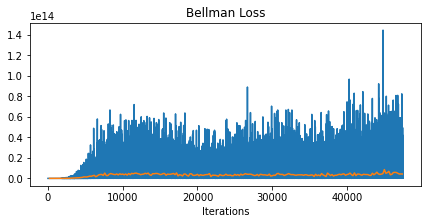

In [0]:
#Double 'Bellman Loss'
small = int(len(stats['loss'])/200)

plot_alive = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_alive[i] = np.mean(stats['loss'][200*i:200*(i+1)])
  x[i] = (i+1)*200

plt.plot(stats['loss'])
plt.plot(x, plot_alive)
plt.xlabel('Iterations')
plt.title('Bellman Loss')

Text(0.5, 1.0, 'Bellman Loss')

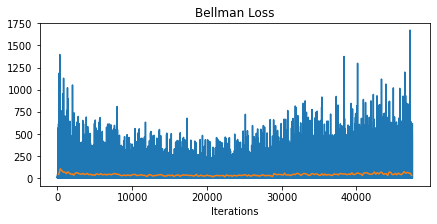

In [0]:
#Dueling 'Bellman Loss'
small = int(len(stats['loss'])/200)

plot_alive = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_alive[i] = np.mean(stats_duel['loss'][200*i:200*(i+1)])
  x[i] = (i+1)*200

plt.plot(stats_duel['loss'])
plt.plot(x, plot_alive)
plt.xlabel('Iterations')
plt.title('Bellman Loss')

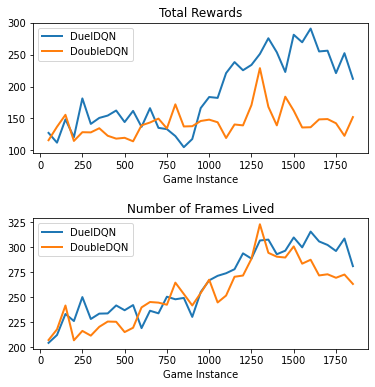

In [0]:
plt.rcParams["figure.figsize"] = (6,6)
small = int(len(stats['total_rewards'])/50)

plot_double = np.zeros(small)
plot_duel = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_double[i] = np.mean(stats['total_rewards'][50*i:50*(i+1)])
  plot_duel[i] = np.mean(stats_duel['total_rewards'][50*i:50*(i+1)])
  x[i] = (i+1)*50

plt.subplot(211)
plt.plot(x, plot_duel, linewidth = 2, label = 'DuelDQN')
plt.plot(x, plot_double, linewidth = 2, label= 'DoubleDQN')
plt.xlabel('Game Instance')
plt.title('Total Rewards')
plt.legend()

small = int(len(stats['alive_frames'])/50)

plot_double = np.zeros(small)
plot_duel = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_double[i] = np.mean(stats['alive_frames'][50*i:50*(i+1)])
  plot_duel[i] = np.mean(stats_duel['alive_frames'][50*i:50*(i+1)])
  x[i] = (i+1)*50

plt.subplot(212)
plt.plot(x, plot_duel, linewidth = 2, label = 'DuelDQN')
plt.plot(x, plot_double, linewidth = 2, label= 'DoubleDQN')

plt.xlabel('Game Instance')
plt.title('Number of Frames Lived')
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

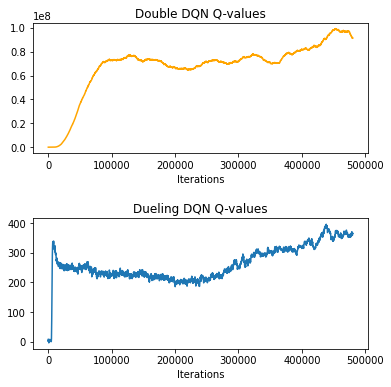

In [0]:
plt.rcParams["figure.figsize"] = (6,6)

#Doubel Q-vals
small = int(len(stats['q_values'])/10)

plot_double = np.zeros(small)
plot_duel = np.zeros(small)
x = np.zeros(small)
for i in range(small):
  plot_double[i] = np.mean(stats['q_values'][10*i:10*(i+1)])
  plot_duel[i] = np.mean(stats_duel['q_values'][10*i:10*(i+1)])
  x[i] = (i+1)*100

plt.subplot(211)
plt.plot(x, plot_double, 'orange')
plt.xlabel('Iterations')
plt.title('Double DQN Q-values')

plt.subplot(212)
plt.plot(x, plot_duel)
plt.xlabel('Iterations')
plt.title('Dueling DQN Q-values')

plt.subplots_adjust(hspace=0.5)
plt.show()